# Environment Analysis

Gymnasium Documentation for double inverted pendulum at the followng link: __[Double Inverted Pendulum](https://gymnasium.farama.org/environments/mujoco/inverted_double_pendulum/)__.

In [1]:
# Import packages
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import time

from IPython.display import clear_output

## Description

This environment originates from control theory and builds on the cartpole environment based on the work done by Barto, Sutton, and Anderson in “Neuronlike adaptive elements that can solve difficult learning control problems”, powered by the Mujoco physics simulator.

This environment involves a cart that can moved linearly, with a pole fixed on it and a second pole fixed on the other end of the first one (leaving the second pole as the only one with one free end). The cart can be pushed left or right, and the goal is to balance the second pole on top of the first pole, which is in turn on top of the cart, by applying continuous forces on the cart.

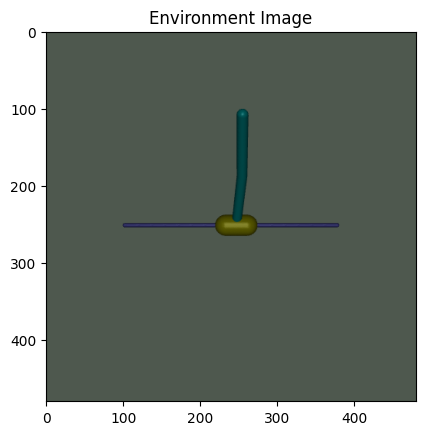

In [2]:
env = gym.make("InvertedDoublePendulum-v4", render_mode='rgb_array')
env.reset()
plt.imshow(env.render())
plt.title('Environment Image')
plt.show()

## Action Space
The agent take a 1-element vector for actions.

The action space is a continuous (action) in [-1, 1], where action represents the numerical force applied to the cart (with magnitude representing the amount of force and sign representing the direction)

In [3]:
print(f'action space = {env.action_space}')

action space = Box(-1.0, 1.0, (1,), float32)


## Observation Space
The state space consists of positional values of different body parts of the pendulum system, followed by the velocities of those individual parts (their derivatives) with all the positions ordered before all the velocities.

Mujoco attempts at getting realistic physics simulations for the possible physical contact dynamics by aiming for physical accuracy and computational efficiency.

There is one constraint force for contacts for each degree of freedom (3).

The observation is therefore a ndarray with shape (11,), (five spatial coordinates, three velocity coordinates and three constraints).

In [4]:
print(f'observation space = {env.observation_space}')

observation space = Box(-inf, inf, (11,), float64)


## Rewards

The rewards consist of two parts:
 - **alive_bonus**: The goal is to make the second inverted pendulum stand upright (within a certain angle limit) as long as possible - as such a reward of +10 is awarded for each timestep that the second pole is upright;

* **distance_penalty**: This reward is a measure of how far the tip of the second pendulum (the only free end) moves, and it is calculated as $0.01x^2 + (y - 2)^2$, where x is the x-coordinate of the tip and y is the y-coordinate of the tip of the second pole;

 - **velocity_penalty**: A negative reward for penalising the agent if it moves too fast $0.001v_1^2 + 0.005v_2^2$.

The total reward returned is **reward** = alive_bonus - distance_penalty - velocity_penalty.


In [5]:
print(f'reward range = {env.reward_range}')

reward range = (-inf, inf)


## Starting State

All observations start in state $(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)$ with a uniform noise in the range of $[-0.1, 0.1]$ added to the positional values (cart position and pole angles) and standard normal force with a standard deviation of 0.1 added to the velocity values for stochasticity.

## Episode End

The episode ends when any of the following happens:

 - **Truncation**: The episode duration reaches 1000 timesteps (success);
* **Termination**: Any of the state space values is no longer finite;
 - **Termination**: The y_coordinate of the tip of the second pole is less than or equal to 1. The maximum standing height of the system is 1.196 m when all the parts are perpendicularly vertical on top of each other).